# Метрическая классификация. Метод ближайших соседей и его развитие
# Практическая работа

## Цели практической работы
Научиться:
- строить модель методом ближайших соседей на реальных данных;
- правильно определять качество работы модели.


## Что входит в практическую работу


- Загрузить данные и ознакомиться с ними.
- Изучить данные и провести анализ.
- Разделить данные на обучающую и тестовую выборки.
- Реализовать построение модели с помощью  библиотеки Scikit-learn.
- Подобрать оптимальное число ближайших соседей методом leave-one-out.
- Получить качество модели с помощью F-меры и матрицы сопряжённости.

## Что оценивается

1. Выполнение всех этапов работы.
2. Наличие вывода по результатам.
3. Непереобученность модели.
4. Качество модели.


**Как отправить работу на проверку?**

1. Скачайте файл с заданием в материалах, откройте его через Jupyter Notebook и выполните задачу. 
2. Сохраните изменения при помощи опции Save and Checkpoint из вкладки File или кнопки Save and Checkpoint на панели инструментов. 
3. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.




# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите дамп базы в Postgres. 
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности. 


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

1. Изучите состав БД с помощью инструмента отрисовки ERD-диаграмм (Entity Relationship diagram отображает все сущности БД, а также визуализирует связность таблиц). Соберите датасет следующей структуры из данных, имеющихся в базе:

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.


Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

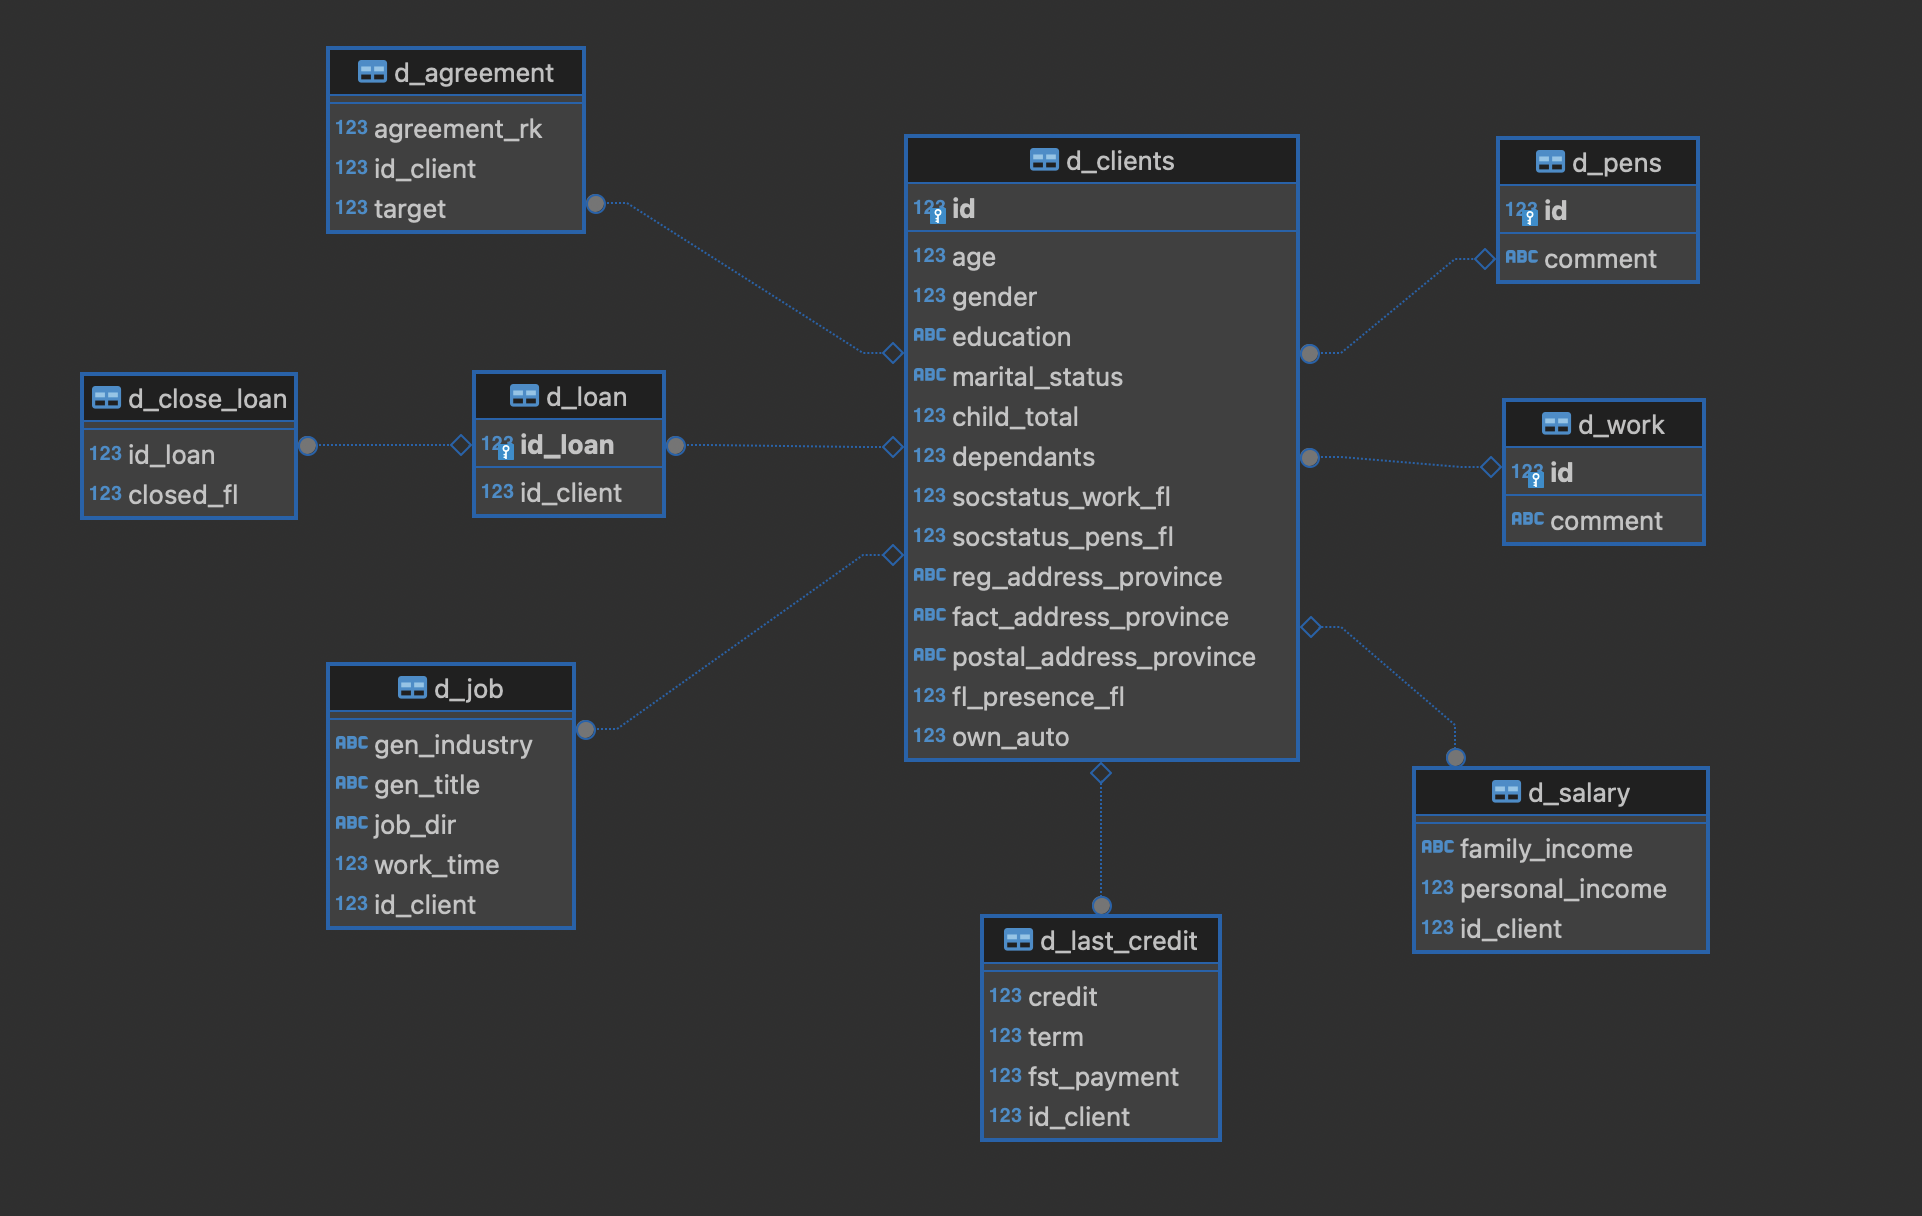

2. Постройте модель зависимости TARGET от остальных параметров получившейся таблицы методом ближайших соседей.

3. Получите качество модели с помощью F-меры и матрицы сопряжённости.

Что нужно сделать после сбора таблицы:

In [1]:
# подключить необходимые библиотеки

# Ваш код здесь
import pandas as pd
import psycopg2 as pg

from sqlalchemy import create_engine
import sqlalchemy as sa

# визуализация
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.utils import resample

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# считать данные

# Ваш код здесь

In [3]:
# conn = pg.connect(
#     dbname='module_6', user='postgres', password='test', host='localhost'
# )
# query = '''
#     SELECT *
#         FROM d_agreement
#     LIMIT 10;
# '''

# d_agreement_df = pd.read_sql(query, conn)
# d_agreement_df.head(15)
print("Данный метод подключения к базе выдавал рекомендацию от Pandas, о том что надо использовать SQLAlchemy, решил попробовать")

Данный метод подключения к базе выдавал рекомендацию от Pandas, о том что надо использовать SQLAlchemy, решил попробовать


In [4]:

# for postgreSQL database credentials can be written as 
user = 'postgres'
password = 'test'
host = 'localhost'
port = '5432'
database = 'module_6'
# for creating connection string
connection_str = f"postgresql://{user}:{password}@{host}:{port}/{database}"

# SQLAlchemy engine
engine = create_engine(connection_str)
# you can test if the connection is made or not
try:
    with engine.connect() as connection_str:
        print('Successfully connected to the PostgreSQL database')
except Exception as ex:
    print(f'Sorry failed to connect: {ex}')


with engine.begin() as conn:
    df_by_tz = pd.read_sql_query(sa.text('''select d_agreement.id_client, d_agreement.agreement_rk, d_agreement.target, 
d_clients.age, d_clients.socstatus_work_fl, d_clients.socstatus_pens_fl, d_clients.gender, d_clients.child_total, d_clients.dependants,
d_salary.personal_income,
loans.loan_num_total, loans.loan_num_closed
from d_agreement
left join d_clients
	on d_clients.id = d_agreement.id_client 
left join (select distinct * from d_salary ds) as d_salary
	on d_salary.id_client = d_agreement.id_client
left join (
	select d_loan.id_client as id_client, sum(d_close_loan.closed_fl) as loan_num_closed, count(d_loan.id_loan) as loan_num_total
	from d_loan
	left join d_close_loan on d_loan.id_loan = d_close_loan.id_loan 
	group by id_client
) loans
	on loans.id_client = d_agreement.id_client;'''), conn)

print(df_by_tz.shape)
print(df_by_tz['id_client'].nunique())

df_by_tz = df_by_tz.astype({
    'id_client': 'int64',
    'agreement_rk': 'int64',
    'target': 'int32',
    'age': 'int32',
    'socstatus_work_fl': 'int32',
    'socstatus_pens_fl': 'int32',
    'gender': 'int32',
    'child_total': 'int32',
    'dependants': 'int32',
    'personal_income': 'float64',
    'loan_num_total': 'int32',
    'loan_num_closed': 'int32'
})
df_by_tz


Successfully connected to the PostgreSQL database
(15223, 12)
15223


,id_client,agreement_rk,target,age,socstatus_work_fl,socstatus_pens_fl,gender,child_total,dependants,personal_income,loan_num_total,loan_num_closed
0,106806258,61123315,0,23,2,1,0,0,0,15000.0,1,0
1,106805567,60450062,0,39,2,1,1,1,1,10000.0,1,0
2,106815588,67018429,1,39,2,1,1,2,2,9000.0,2,1
3,106804734,59973194,0,53,2,1,1,2,0,10500.0,1,1
4,106808282,61934332,0,34,2,1,1,1,1,25000.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15218,106816087,67170798,0,42,2,1,1,2,2,12000.0,1,1
15219,106811613,63988488,0,55,2,2,1,2,0,17000.0,2,1
15220,106814996,66836908,1,30,2,1,0,1,1,15000.0,2,2
15221,106806641,61237351,0,52,2,2,1,2,0,15000.0,1,0


In [5]:
# - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
# - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
# - GENDER — пол клиента (1 — мужчина, 0 — женщина);
df_by_tz['socstatus_work_fl'] = df_by_tz['socstatus_work_fl'].apply(lambda x: 1 if x==2 else 0)
df_by_tz['socstatus_pens_fl'] = df_by_tz['socstatus_pens_fl'].apply(lambda x: 0 if x==2 else 1)
# df_by_tz
print(df_by_tz['socstatus_work_fl'].value_counts())
print(df_by_tz['socstatus_pens_fl'].value_counts())

socstatus_work_fl
1    13847
0     1376
Name: count, dtype: int64
socstatus_pens_fl
1    13176
0     2047
Name: count, dtype: int64


In [6]:
# проведите анализ данных, посмотрите на индивидуальные графики
# зависимости целевой функции и отдельной переменной
# создайте дополнительные переменные
# для работы с категориальными данными можно воспользоваться pd.get_dummies
# сделайте предварительные выводы

# Ваш код здесь


In [7]:
print(df_by_tz['target'].value_counts())
print("Данные не сбалансированы, данных с целевой переменной равной 1 почти в 10 раз меньше. Т.е. положительный класс целевой переменной не достаточно представлен в данных")

target
0    13411
1     1812
Name: count, dtype: int64
Данные не сбалансированы, данных с целевой переменной равной 1 почти в 10 раз меньше. Т.е. положительный класс целевой переменной не достаточно представлен в данных


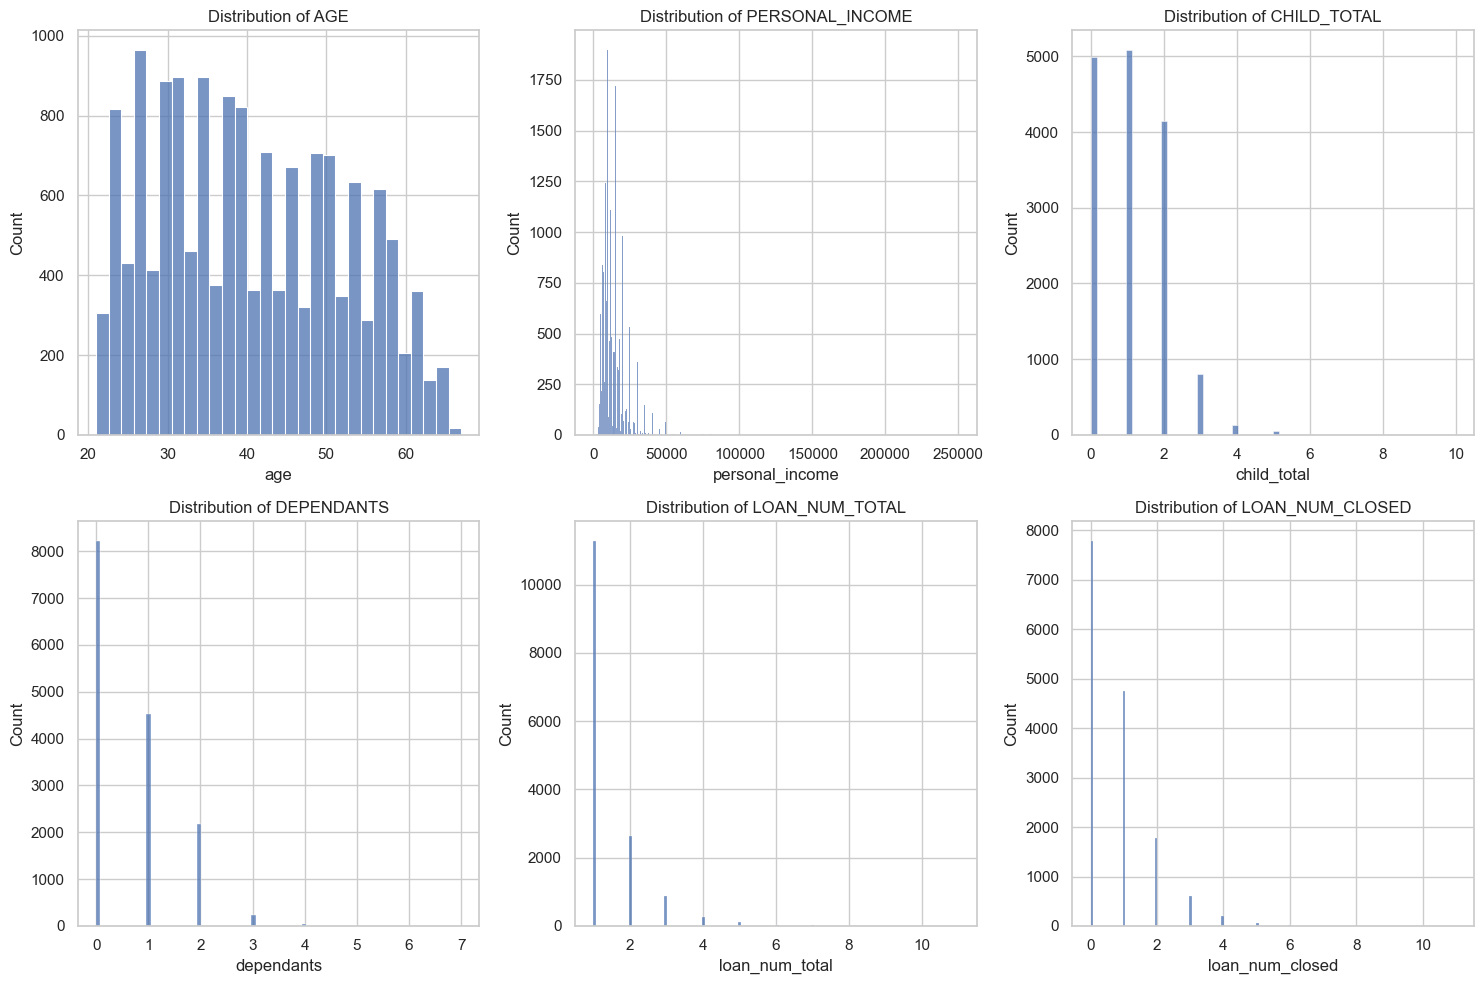

In [8]:
# проведите анализ данных, посмотрите на индивидуальные графики

sns.set(style="whitegrid")


# Создание гистограмм для числовых признаков
numeric_features = ['AGE', 'PERSONAL_INCOME', 'CHILD_TOTAL', 'DEPENDANTS', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_by_tz[feature.lower()])
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

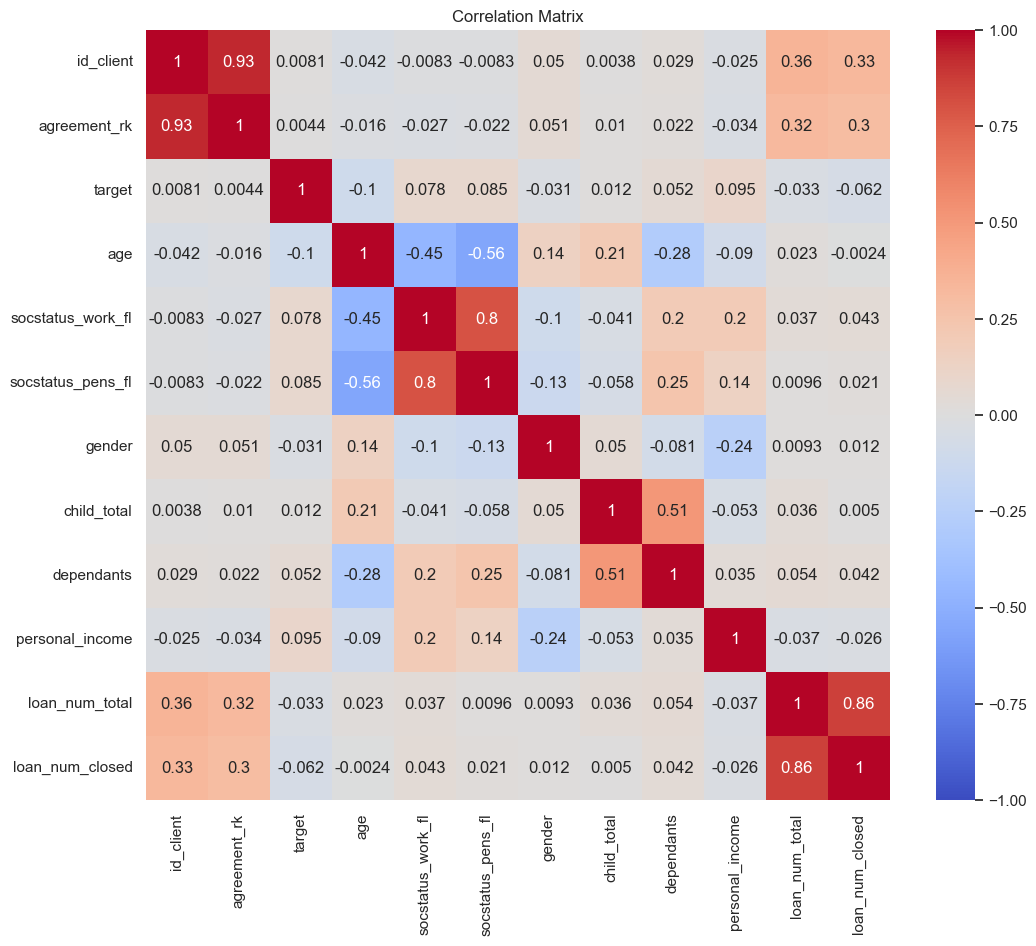

In [9]:
plt.figure(figsize=(12, 10))
corr = df_by_tz.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

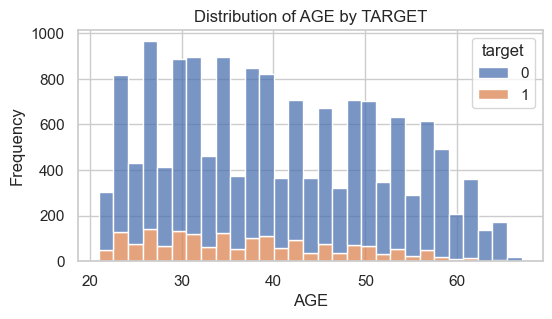

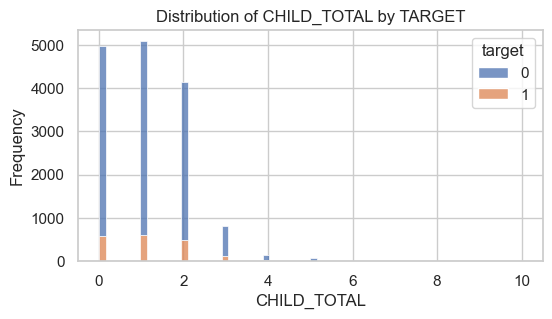

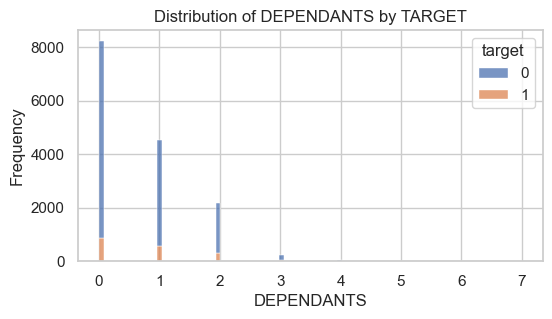

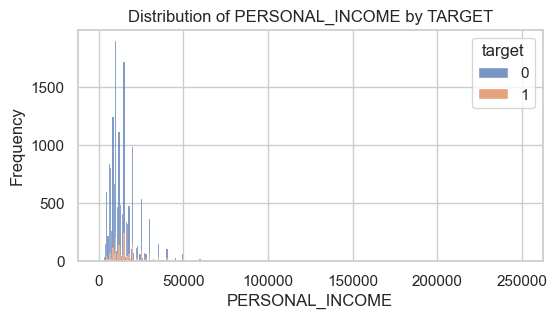

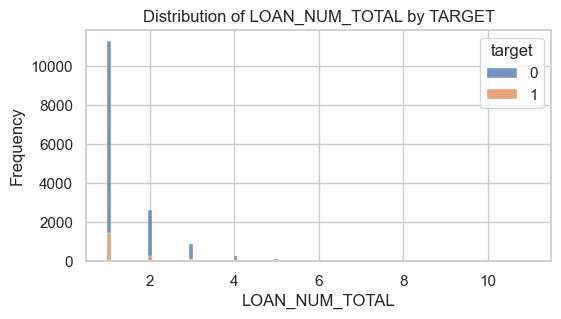

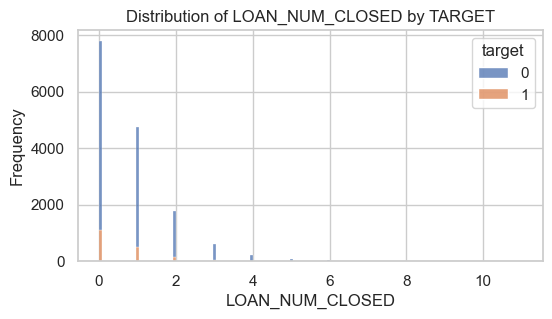

In [10]:

numerical_columns = ['AGE', 'CHILD_TOTAL', 'DEPENDANTS', 'PERSONAL_INCOME', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED']

for column in numerical_columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(data=df_by_tz, x=column.lower(), hue='target', multiple='stack')
    plt.title(f'Distribution of {column} by TARGET')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

<b>Создание новых фитч<b>

In [11]:
with engine.begin() as conn:
    addit_data = pd.read_sql_query(sa.text('''
    SELECT d_job.id_client, d_job.gen_industry, d_job.gen_title, d_job.job_dir, d_job.work_time,
    d_salary.family_income
    FROM d_job
    LEFT JOIN (select distinct * from d_salary) as d_salary on d_salary.id_client = d_job.id_client 
    '''), conn)
addit_data = addit_data.fillna({'work_time': 0, 'job_dir': 'empty', 'gen_title': 'empty', 'gen_industry': 'empty'}).astype({'work_time': 'int32', 'id_client': 'int32'})



In [12]:
data_full = pd.merge(df_by_tz, addit_data, how='left', on='id_client')
data_full

,id_client,agreement_rk,target,age,socstatus_work_fl,socstatus_pens_fl,gender,child_total,dependants,personal_income,loan_num_total,loan_num_closed,gen_industry,gen_title,job_dir,work_time,family_income
0,106806258,61123315,0,23,1,1,0,0,0,15000.0,1,0,Другие сферы,Специалист,Участие в основ. деятельности,26,от 20000 до 50000 руб.
1,106805567,60450062,0,39,1,1,1,1,1,10000.0,1,0,Ресторанный бизнес/Общественное питание,Работник сферы услуг,Участие в основ. деятельности,36,от 10000 до 20000 руб.
2,106815588,67018429,1,39,1,1,1,2,2,9000.0,2,1,Развлечения/Искусство,Специалист,Участие в основ. деятельности,72,от 20000 до 50000 руб.
3,106804734,59973194,0,53,1,1,1,2,0,10500.0,1,1,Торговля,Рабочий,Вспомогательный техперсонал,48,от 10000 до 20000 руб.
4,106808282,61934332,0,34,1,1,1,1,1,25000.0,2,1,Другие сферы,Специалист,Участие в основ. деятельности,108,от 20000 до 50000 руб.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15218,106816087,67170798,0,42,1,1,1,2,2,12000.0,1,1,Здравоохранение,Рабочий,Участие в основ. деятельности,96,от 10000 до 20000 руб.
15219,106811613,63988488,0,55,1,0,1,2,0,17000.0,2,1,Транспорт,Специалист,Участие в основ. деятельности,180,от 10000 до 20000 руб.
15220,106814996,66836908,1,30,1,1,0,1,1,15000.0,2,2,Другие сферы,Руководитель среднего звена,Участие в основ. деятельности,72,от 20000 до 50000 руб.
15221,106806641,61237351,0,52,1,0,1,2,0,15000.0,1,0,Ресторанный бизнес/Общественное питание,Рабочий,Вспомогательный техперсонал,7,от 20000 до 50000 руб.


In [13]:
data_full['target'].value_counts()

target
0    13411
1     1812
Name: count, dtype: int64

In [14]:
# преоброзуем данные с помозью get_dummies
ohe_data = pd.get_dummies(data_full, dtype=int)
ohe_data


,id_client,agreement_rk,target,age,socstatus_work_fl,socstatus_pens_fl,gender,child_total,dependants,personal_income,...,job_dir_Реклама и маркетинг,job_dir_Служба безопасности,job_dir_Снабжение и сбыт,job_dir_Участие в основ. деятельности,job_dir_Юридическая служба,family_income_до 5000 руб.,family_income_от 10000 до 20000 руб.,family_income_от 20000 до 50000 руб.,family_income_от 5000 до 10000 руб.,family_income_свыше 50000 руб.
0,106806258,61123315,0,23,1,1,0,0,0,15000.0,...,0,0,0,1,0,0,0,1,0,0
1,106805567,60450062,0,39,1,1,1,1,1,10000.0,...,0,0,0,1,0,0,1,0,0,0
2,106815588,67018429,1,39,1,1,1,2,2,9000.0,...,0,0,0,1,0,0,0,1,0,0
3,106804734,59973194,0,53,1,1,1,2,0,10500.0,...,0,0,0,0,0,0,1,0,0,0
4,106808282,61934332,0,34,1,1,1,1,1,25000.0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15218,106816087,67170798,0,42,1,1,1,2,2,12000.0,...,0,0,0,1,0,0,1,0,0,0
15219,106811613,63988488,0,55,1,0,1,2,0,17000.0,...,0,0,0,1,0,0,1,0,0,0
15220,106814996,66836908,1,30,1,1,0,1,1,15000.0,...,0,0,0,1,0,0,0,1,0,0
15221,106806641,61237351,0,52,1,0,1,2,0,15000.0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
# удалим id_client из данных
ohe_data.drop(columns=['id_client'], inplace=True)

In [16]:
# Стандартизация числовых данных
numeric_columns = ['agreement_rk', 'age', 'personal_income', 'work_time']
scaler = MinMaxScaler()#StandardScaler()
std_matrix = scaler.fit_transform(ohe_data[numeric_columns])
std_df = pd.DataFrame(data=std_matrix, columns=numeric_columns, index=ohe_data.index)

# std_ohe_data = ohe_data.drop(numeric_columns, axis=1)
std_ohe_data = pd.concat([ohe_data.drop(numeric_columns, axis=1), std_df], axis=1)
std_ohe_data

,target,socstatus_work_fl,socstatus_pens_fl,gender,child_total,dependants,loan_num_total,loan_num_closed,gen_industry_empty,gen_industry_Банк/Финансы,...,job_dir_Юридическая служба,family_income_до 5000 руб.,family_income_от 10000 до 20000 руб.,family_income_от 20000 до 50000 руб.,family_income_от 5000 до 10000 руб.,family_income_свыше 50000 руб.,agreement_rk,age,personal_income,work_time
0,0,1,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0.078869,0.043478,0.059910,0.000009
1,0,1,1,1,1,1,1,0,0,0,...,0,0,1,0,0,0,0.035100,0.391304,0.039908,0.000013
2,1,1,1,1,2,2,2,1,0,0,...,0,0,0,1,0,0,0.462114,0.391304,0.035907,0.000025
3,0,1,1,1,2,0,1,1,0,0,...,0,0,1,0,0,0,0.004099,0.695652,0.041908,0.000017
4,0,1,1,1,1,1,2,1,0,0,...,0,0,0,1,0,0,0.131593,0.282609,0.099914,0.000038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15218,0,1,1,1,2,2,1,1,0,0,...,0,0,1,0,0,0,0.472020,0.456522,0.047909,0.000033
15219,0,1,0,1,2,0,2,1,0,0,...,0,0,1,0,0,0,0.265135,0.739130,0.067911,0.000063
15220,1,1,1,0,1,1,2,2,0,0,...,0,0,0,1,0,0,0.450313,0.195652,0.059910,0.000025
15221,0,1,0,1,2,0,1,0,0,0,...,0,0,0,1,0,0,0.086282,0.673913,0.059910,0.000002


In [17]:
# Oversampling
# Отделяем примеры класса меньшинства
minority_class = std_ohe_data[std_ohe_data['target'] == 1]

# Отделяем примеры класса большинства
majority_class = std_ohe_data[std_ohe_data['target'] == 0]
print(f"Minority class len: {minority_class.shape[0]} || Majority class shape: {majority_class.shape}")

# Выполняем оверсемплинг класса меньшинства
minority_upsampled = resample(minority_class, 
                              replace=True,     # репликация с заменой
                              n_samples=majority_class.shape[0],    # количество примеров, равное количеству в классе большинства
                              random_state=42)  # фиксируем seed для воспроизводимости

# Объединяем обратно в один DataFrame
upsampled_data = pd.concat([majority_class, minority_upsampled])


# # Downsampling 
# minority_class = upsampled_data[upsampled_data['target'] == 1]
# majority_class = upsampled_data[upsampled_data['target'] == 0]

# # Выполняем ресемплинг класса большинства
# majority_downsampled = resample(majority_class, 
#                                 replace=False,    # репликация без замены
#                                 n_samples=minority_class.shape[0],    # количество примеров, равное количеству в классе меньшинства
#                                 random_state=42)  # фиксируем seed для воспроизводимости

# # Объединяем обратно в один DataFrame
# downsampled_data = pd.concat([minority_class, majority_downsampled])

print(f"Upsampled data: {upsampled_data.shape}")


Minority class len: 1812 || Majority class shape: (13411, 73)
Upsampled data: (26822, 73)


In [18]:
# раздедлите на обучающую и тестовую выборки

# Ваш код здесь

data_train, data_test = train_test_split(upsampled_data, test_size=0.2, random_state=27)
print(f"Train shape:{data_train.shape} | Test shape: {data_test.shape}")

Train shape:(21457, 73) | Test shape: (5365, 73)


In [19]:
# обучите модель методом ближайших соседей

# Ваш код здесь
train_fitches = data_train.drop(columns=['target'])
train_target = data_train['target']

kn_clsf = KNeighborsClassifier(n_neighbors=17, n_jobs=-1)
kn_clsf.fit(train_fitches, train_target)

prediction_train = kn_clsf.predict(data_train.drop(columns=['target']))
f1_train = f1_score(data_train['target'], prediction_train)  # Используйте 'weighted' для взвешенной F-меры
print(f'Train F-меры: {f1_train}')

prediction_test = kn_clsf.predict(data_test.drop(columns=['target']))
f1_test = f1_score(data_test['target'], prediction_test)  # Используйте 'weighted' для взвешенной F-меры
print(f'Test F-меры: {f1_test}')

Train F-меры: 0.7456262972847036
Test F-меры: 0.7104220499569337


In [20]:
# проверьте качество модели с помощью F-мера

# Ваш код здесь
print(f'F-меры test: {f1_test}')
print(f'F-меры train: {f1_train}')

F-меры test: 0.7104220499569337
F-меры train: 0.7456262972847036


Test data 
 target
0    2727
1    2638
Name: count, dtype: int64
3167


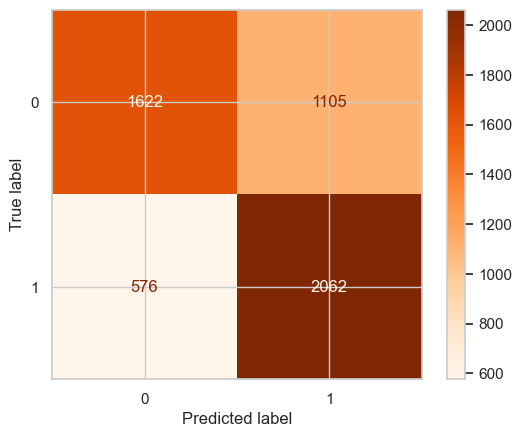

In [21]:
# проверьте качество модели с помощью матрицы сопряжённостей

# Ваш код здесь
print("Test data \n", data_test['target'].value_counts())
print(prediction_test.sum())
cm = confusion_matrix(data_test['target'], prediction_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=kn_clsf.classes_)
disp.plot(cmap=plt.cm.Oranges)
plt.show()

Train data 
 target
1    10773
0    10684
Name: count, dtype: int64
Positive prdiction:  12834


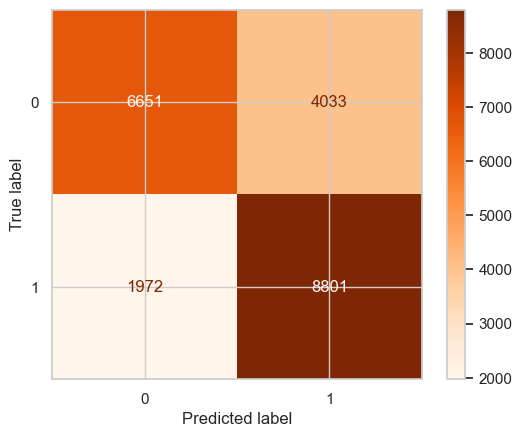

In [22]:
print("Train data \n", data_train['target'].value_counts())
print("Positive prdiction: ",prediction_train.sum())
cm = confusion_matrix(data_train['target'], prediction_train)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=kn_clsf.classes_)
disp.plot(cmap=plt.cm.Oranges)
plt.show()

F-меры FULL DATA: 0.700194220785057
FULL data 
 target
0    13411
1     1812
Name: count, dtype: int64

positive prediction num:  6549


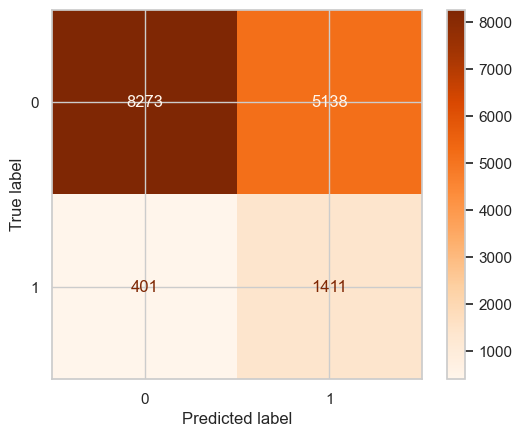

In [24]:
# Prdiction by FULL DATA
prediction_fulldata = kn_clsf.predict(std_ohe_data.drop(columns=['target']))
f1_fulldata = f1_score(std_ohe_data['target'], prediction_fulldata, average='weighted')  # Используйте 'weighted' для взвешенной F-меры
print(f'F-меры FULL DATA: {f1_fulldata}')

print("FULL data \n", std_ohe_data['target'].value_counts())
print("\npositive prediction num: ", prediction_fulldata.sum())
cm = confusion_matrix(std_ohe_data['target'], prediction_fulldata)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=kn_clsf.classes_)
disp.plot(cmap=plt.cm.Oranges)
plt.show()

    # сделайте вывод о работе модели

    # Ваш текст здесь

Классы в трейн и тест были сбалансированы, метрики на этих выборках ведут себя неплохо поэтому решил оформить работу и сдать.
\n Но оценивать модель думаю стоит на данных которые не были сбалансированы. (Поправьте пожалуйста если я заблуждаюсь)
\n Поэтому дальнейшие выводы будут касаться матрицы ошибок по исходному датафрейму.
Модель почти не ошибается в предсказание отрицательного класса и нашла большую часть положительного. Но слишком много ложноположительных, если настраивать рекламную компанию или делать обзвоны клиентам по предсказанию данной модели, будет проделано слишком много лишней работы и потрачено лишних денег. \n
С другой стороны, если цель бизнеса просто высылать письма тогда это будет не так трудозатратно.

Для получения F меры я использовал f1_score, как то не задумываясь даже нашел эту метрику в библиотеке. А потом только при написание вывода вспомнил что в обучение был подсчет с использованием recal и precision. Надеюсь это не ошибка, при необходимости переделаю.
